In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [53]:
train_df = pd.read_csv("./train.csv", encoding = 'ISO-8859-1', low_memory = False)
test_df = pd.read_csv("./test.csv", encoding = 'ISO-8859-1', low_memory = False)
sample_df = pd.read_csv("./sample_submission.csv", encoding = 'ISO-8859-1', low_memory = False)

display(train_df.head())
display(test_df.head())
display(sample_df.head())

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0


,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport
0,74835,22MAR2014,GRD,M,29,Y,Y,0,0,-2.271884,3,50,1,2,50000,1,4,N
1,17527,24JAN2014,SCH,F,39,N,N,5,0,-1.504999,2,50,1,2,5000,4,3,N
2,75683,23MAR2014,UGR,M,50,Y,Y,0,0,-1.691339,1,50,1,2,30000,1,3,Y
3,26883,03FEB2014,SCH,M,56,N,N,0,0,-2.374182,1,40,1,2,17000,1,3,N
4,28862,04FEB2014,GRD,F,38,N,N,0,0,-2.487502,0,80,2,3,120000,1,3,N


,client_id,default
0,74835,0
1,17527,0
2,75683,0
3,26883,0
4,28862,0


In [54]:
display(train_df.info())
display(test_df.info())
display(sample_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36349 entries, 0 to 36348
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         36349 non-null  int64  
 1   app_date          36349 non-null  object 
 2   education         36178 non-null  object 
 3   sex               36349 non-null  object 
 4   age               36349 non-null  int64  
 5   car               36349 non-null  object 
 6   car_type          36349 non-null  object 
 7   decline_app_cnt   36349 non-null  int64  
 8   good_work         36349 non-null  int64  
 9   score_bki         36349 non-null  float64
 10  bki_request_cnt   36349 non-null  int64  
 11  region_rating     36349 non-null  int64  
 12  home_address      36349 non-null  int64  
 13  work_address      36349 non-null  int64  
 14  income            36349 non-null  int64  
 15  sna               36349 non-null  int64  
 16  first_time        36349 non-null  int64 

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36349 entries, 0 to 36348
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   client_id  36349 non-null  int64
 1   default    36349 non-null  int64
dtypes: int64(2)
memory usage: 568.1 KB


None

In [55]:
display(train_df.isnull().sum(axis = 0))
display(test_df.isnull().sum(axis = 0))
display(sample_df.isnull().sum(axis = 0))

client_id             0
app_date              0
education           307
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
score_bki             0
bki_request_cnt       0
region_rating         0
home_address          0
work_address          0
income                0
sna                   0
first_time            0
foreign_passport      0
default               0
dtype: int64

client_id             0
app_date              0
education           171
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
score_bki             0
bki_request_cnt       0
region_rating         0
home_address          0
work_address          0
income                0
sna                   0
first_time            0
foreign_passport      0
dtype: int64

client_id    0
default      0
dtype: int64

In [56]:
# Объединяем выборки для удобного нормализирования данных
df = pd.concat([train_df, test_df])
df.isnull().sum()[df.isnull().sum() > 0]

education      478
default      36349
dtype: int64

In [57]:
# Заполняем пропуски в графе Education с наиболее чаще встречающимся значением
df['education'] = df.education.fillna(df.education.iloc[0])

In [58]:
df['app_date'] = pd.to_datetime(df.app_date)
df['app_date_month'] = df.app_date.dt.month
df['app_date_day'] = df.app_date.dt.day
df['app_date_weekday'] = df.app_date.dt.weekday
df.drop('app_date', axis=1, inplace=True)
df.head()

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,...,home_address,work_address,income,sna,first_time,foreign_passport,default,app_date_month,app_date_day,app_date_weekday
0,25905,SCH,M,62,Y,Y,0,0,-2.008753,1,...,1,2,18000,4,1,N,0.0,2,1,5
1,63161,SCH,F,59,N,N,0,0,-1.532276,3,...,2,3,19000,4,1,N,0.0,3,12,2
2,25887,SCH,M,25,Y,N,2,0,-1.408142,1,...,1,2,30000,1,4,Y,0.0,2,1,5
3,16222,SCH,F,53,N,N,0,0,-2.057471,2,...,2,3,10000,1,3,N,0.0,1,23,3
4,101655,GRD,M,48,N,N,0,1,-1.244723,1,...,2,3,30000,1,4,Y,0.0,4,18,4


In [59]:
# Чтобы разделить датасет на типы данных нужно определить какого рода уникальных данных у нас есть
df.nunique(dropna=False).sort_values(ascending=False)

client_id           110148
score_bki           102618
income                1207
age                     52
bki_request_cnt         40
app_date_day            31
decline_app_cnt         24
region_rating            7
app_date_weekday         7
education                5
sna                      4
first_time               4
app_date_month           4
home_address             3
work_address             3
default                  3
good_work                2
car_type                 2
car                      2
foreign_passport         2
sex                      2
dtype: int64

In [60]:
#бинарные переменные 
bin_cols = ['sex', 'car', 'car_type', 'good_work', 'foreign_passport']

#категориальные переменные
cat_cols = ['education', 'work_address', 'home_address', 'first_time', 'sna', 'region_rating', 'app_date_day', 'app_date_weekday', 'app_date_month']

#числовые переменные
num_cols = ['age', 'decline_app_cnt', 'bki_request_cnt', 'income', 'score_bki']

In [61]:
# приведем в числовой вид все строчные значения

le = LabelEncoder()

for col in bin_cols:
    df[col] = le.fit_transform(df[col])

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

df.head()

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,...,home_address,work_address,income,sna,first_time,foreign_passport,default,app_date_month,app_date_day,app_date_weekday
0,25905,3,1,62,1,1,0,0,-2.008753,1,...,0,1,18000,3,0,0,0.0,1,0,5
1,63161,3,0,59,0,0,0,0,-1.532276,3,...,1,2,19000,3,0,0,0.0,2,11,2
2,25887,3,1,25,1,0,2,0,-1.408142,1,...,0,1,30000,0,3,1,0.0,1,0,5
3,16222,3,0,53,0,0,0,0,-2.057471,2,...,1,2,10000,0,2,0,0.0,0,22,3
4,101655,1,1,48,0,0,0,1,-1.244723,1,...,1,2,30000,0,3,1,0.0,3,17,4


In [62]:
def checkIfOut(ser):
    IQR = ser.quantile(0.75) - ser.quantile(0.25)
    perc25 = ser.quantile(0.25)
    perc75 = ser.quantile(0.75)
    lowerBorder = perc25 - 1.5*IQR
    upperBorder = perc75 + 1.5*IQR

    print("границы выбросов: [{f}, {l}].".format(f=lowerBorder, l=upperBorder))
    print("минимальные и максимальные значения: [{min}, {max}].".format(min=ser.min(), max=ser.max()))
    ser = ser.apply(lambda x: None if x < lowerBorder or x > upperBorder else x)
    return ser

In [63]:
# как видно почти в каждом числовом столбце есть выбросы
for col in num_cols:
    print('Колонка: ' + col)
    checkIfOut(df[col])

Колонка: age
границы выбросов: [3.0, 75.0].
минимальные и максимальные значения: [21, 72].
Колонка: decline_app_cnt
границы выбросов: [0.0, 0.0].
минимальные и максимальные значения: [0, 33].
Колонка: bki_request_cnt
границы выбросов: [-4.5, 7.5].
минимальные и максимальные значения: [0, 53].
Колонка: income
границы выбросов: [-22000.0, 90000.0].
минимальные и максимальные значения: [1000, 1000000].
Колонка: score_bki
границы выбросов: [-3.299251946250001, -0.5290698762499992].
минимальные и максимальные значения: [-3.62458632, 0.19977285].


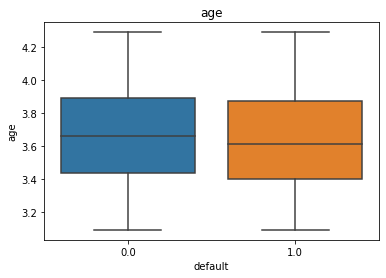

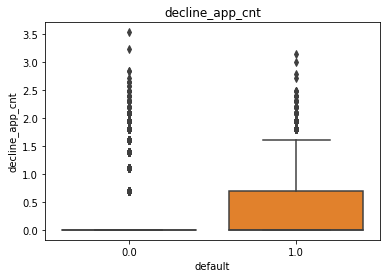

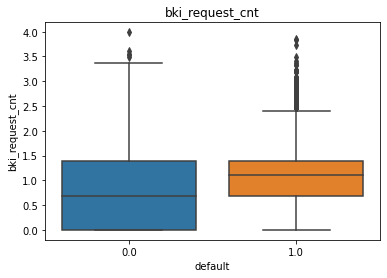

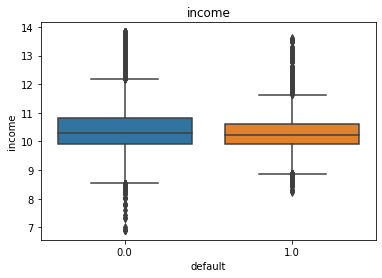

/Users/ilkhom/Library/Python/3.8/lib/python/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


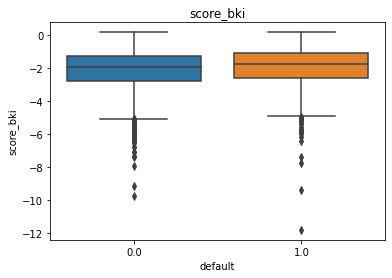

In [64]:
# логарифмирем значения для "сглаживания" выбросов и смотрим на результат

for col in num_cols:
    plt.figure()
    # sns.boxplot(data=df, x='default', y=col)#np.log(df[col]+1))
    sns.boxplot(data=df, x='default', y=np.log(df[col]+1))
    plt.title(col)
    plt.show()

<Figure size 432x288 with 0 Axes>

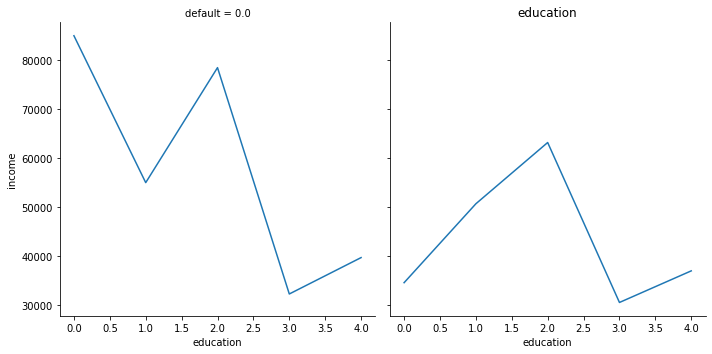

<Figure size 432x288 with 0 Axes>

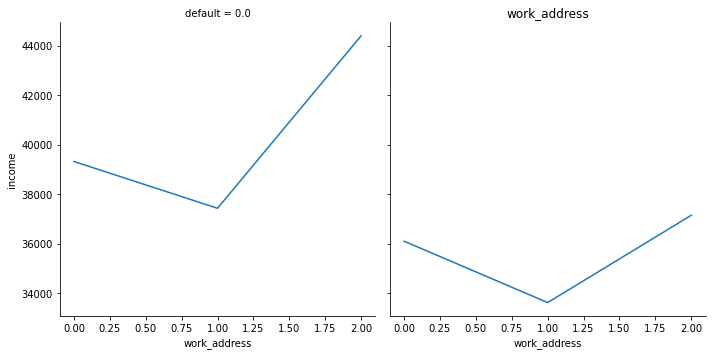

<Figure size 432x288 with 0 Axes>

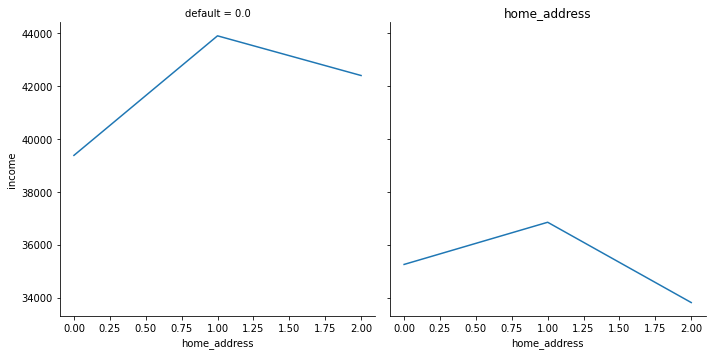

<Figure size 432x288 with 0 Axes>

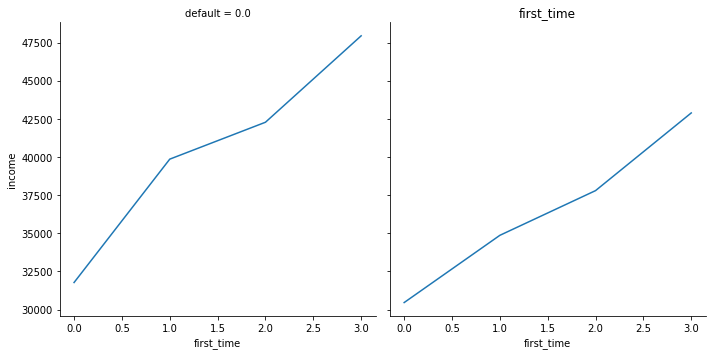

<Figure size 432x288 with 0 Axes>

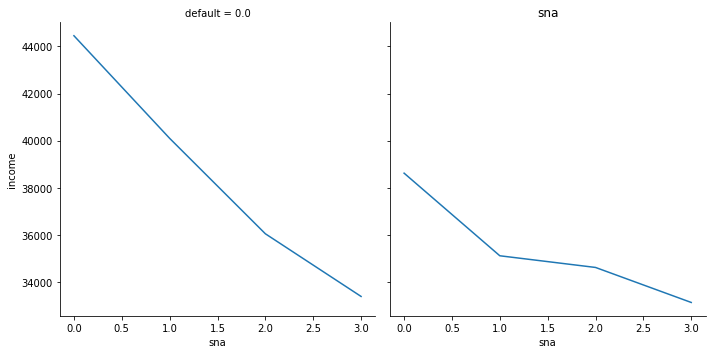

<Figure size 432x288 with 0 Axes>

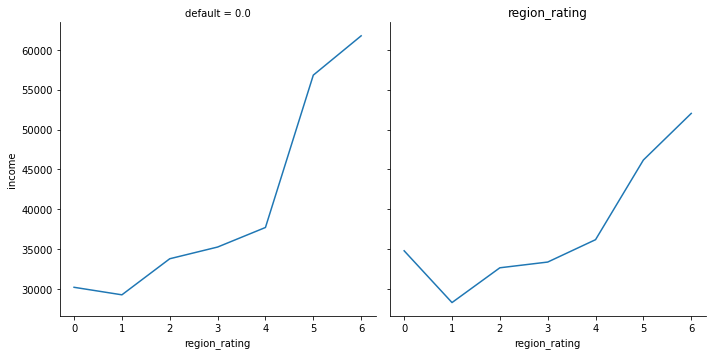

<Figure size 432x288 with 0 Axes>

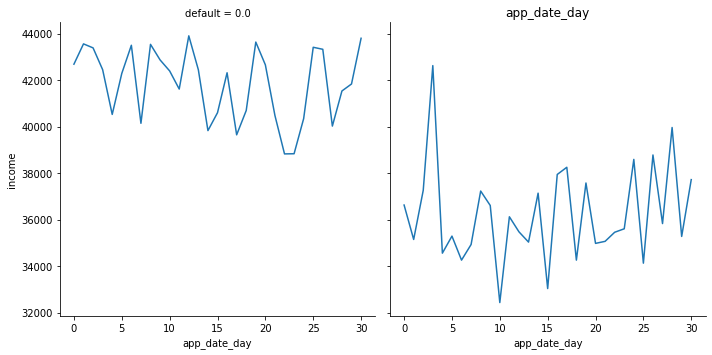

<Figure size 432x288 with 0 Axes>

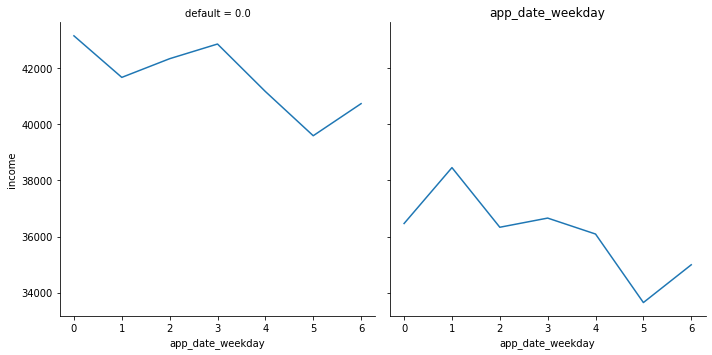

<Figure size 432x288 with 0 Axes>

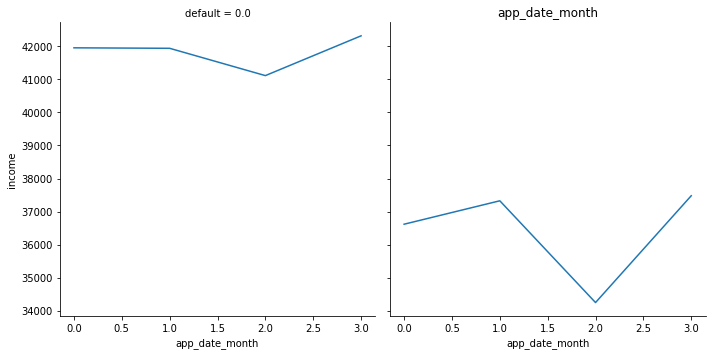

In [65]:
for col in cat_cols:
    plt.figure()
    # sns.lineplot(data=df, y='default', x=col)
    sns.relplot(data=df, y = 'income', x = col, kind='line',ci=None, col='default')
    plt.title(col)
    plt.show()

In [66]:
# много интересных деталей можно узнать по графикам
# education - почти все заявители со школьным образованием кто попал в дефолт имели очень низкий доход
# first-time - чем больше заявок делали люди по займам тем выше у них был доход
# sna - тоже интересный показатель, коротый показывает что чтобы получить займ нужно иметь либо хороший доход либо хорошие связи

<AxesSubplot:>

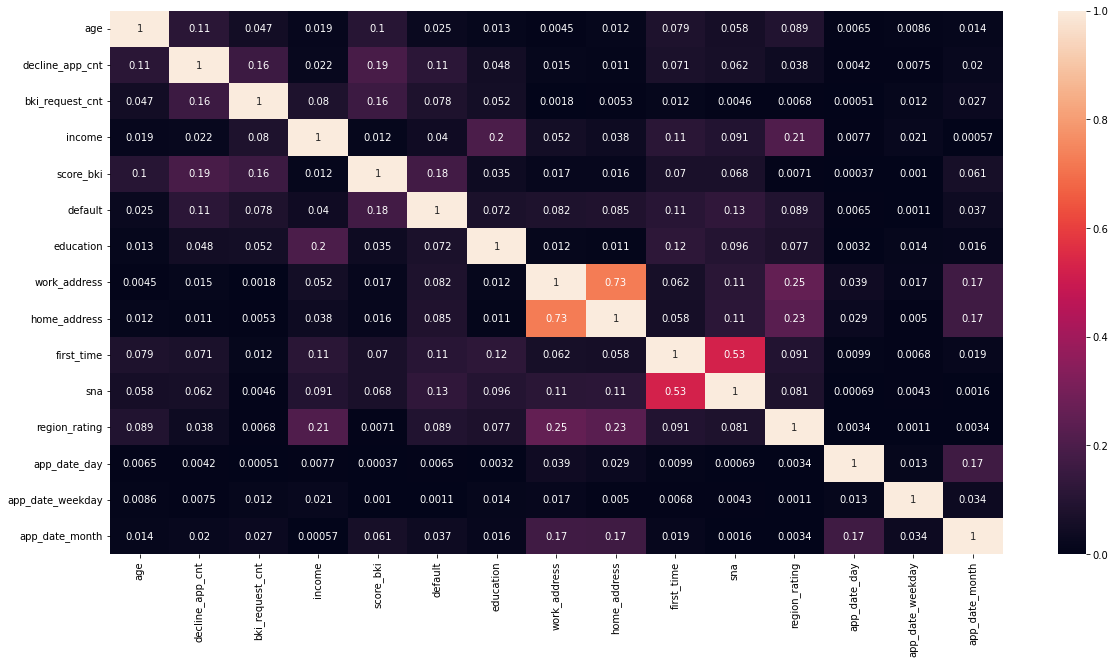

In [67]:
plt.figure(figsize=(20,10))
sns.heatmap(df[num_cols+['default']+cat_cols].corr().abs(), vmin=0, vmax=1, annot=True)
# значимая корреляция есть между home_address и work_address а также между sna и first_time
# а также вполне понятняя связь между регионом и образованием с доходом

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110148 entries, 0 to 36348
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   client_id         110148 non-null  int64  
 1   education         110148 non-null  int64  
 2   sex               110148 non-null  int64  
 3   age               110148 non-null  int64  
 4   car               110148 non-null  int64  
 5   car_type          110148 non-null  int64  
 6   decline_app_cnt   110148 non-null  int64  
 7   good_work         110148 non-null  int64  
 8   score_bki         110148 non-null  float64
 9   bki_request_cnt   110148 non-null  int64  
 10  region_rating     110148 non-null  int64  
 11  home_address      110148 non-null  int64  
 12  work_address      110148 non-null  int64  
 13  income            110148 non-null  int64  
 14  sna               110148 non-null  int64  
 15  first_time        110148 non-null  int64  
 16  foreign_passport  110

<AxesSubplot:>

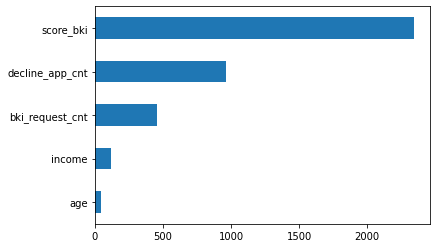

In [69]:
from sklearn.feature_selection import f_classif, mutual_info_classif
imp_num = pd.Series(f_classif(df[df.default.isna() == False][num_cols], df[df.default.isna() == False]['default'])[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

<AxesSubplot:>

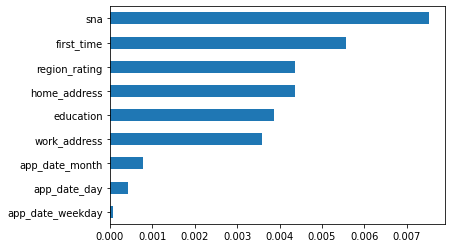

In [70]:
imp_cat = pd.Series(mutual_info_classif(df[df.default.isna() == False][cat_cols], df[df.default.isna() == False]['default'], discrete_features =True), index = cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

<AxesSubplot:>

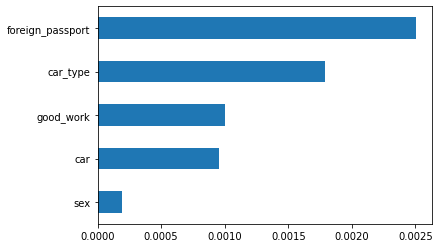

In [71]:
imp_cat = pd.Series(mutual_info_classif(df[df.default.isna() == False][bin_cols], df[df.default.isna() == False]['default'], discrete_features =True), index = bin_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

In [72]:
df_train = df[df.default.isna() == False]
df_test = df[df.default.isna() == True]

display(df_train)
display(df_test)

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,...,home_address,work_address,income,sna,first_time,foreign_passport,default,app_date_month,app_date_day,app_date_weekday
0,25905,3,1,62,1,1,0,0,-2.008753,1,...,0,1,18000,3,0,0,0.0,1,0,5
1,63161,3,0,59,0,0,0,0,-1.532276,3,...,1,2,19000,3,0,0,0.0,2,11,2
2,25887,3,1,25,1,0,2,0,-1.408142,1,...,0,1,30000,0,3,1,0.0,1,0,5
3,16222,3,0,53,0,0,0,0,-2.057471,2,...,1,2,10000,0,2,0,0.0,0,22,3
4,101655,1,1,48,0,0,0,1,-1.244723,1,...,1,2,30000,0,3,1,0.0,3,17,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73794,54887,1,0,45,0,0,0,0,-1.792064,3,...,0,1,17000,3,3,0,0.0,2,3,1
73795,76821,3,1,41,1,1,0,0,-2.058029,1,...,1,1,70000,0,3,0,0.0,2,23,0
73796,103695,3,1,31,0,0,0,0,-1.512635,4,...,1,2,45000,1,1,0,0.0,3,21,1
73797,861,3,0,29,0,0,0,1,-1.479334,3,...,0,2,13000,1,2,0,1.0,0,3,5


,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,...,home_address,work_address,income,sna,first_time,foreign_passport,default,app_date_month,app_date_day,app_date_weekday
0,74835,1,1,29,1,1,0,0,-2.271884,3,...,0,1,50000,0,3,0,NaN,2,21,5
1,17527,3,0,39,0,0,5,0,-1.504999,2,...,0,1,5000,3,2,0,NaN,0,23,4
2,75683,4,1,50,1,1,0,0,-1.691339,1,...,0,1,30000,0,2,1,NaN,2,22,6
3,26883,3,1,56,0,0,0,0,-2.374182,1,...,0,1,17000,0,2,0,NaN,1,2,0
4,28862,1,0,38,0,0,0,0,-2.487502,0,...,1,2,120000,0,2,0,NaN,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36344,83775,3,0,37,0,0,1,0,-1.744976,3,...,1,2,15000,3,0,0,NaN,2,30,0
36345,106254,1,0,64,1,1,0,0,-2.293781,3,...,0,1,200000,0,3,0,NaN,3,24,4
36346,81852,1,1,31,0,0,2,0,-0.940752,1,...,0,1,60000,3,1,0,NaN,2,29,6
36347,1971,4,0,27,0,0,1,0,-1.242392,2,...,1,2,30000,0,0,0,NaN,0,6,1


In [73]:
from sklearn.metrics import roc_auc_score, roc_curve, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder

def calculate(y_test, y_pred, y_probs):    
    calcs = {}
    calcs['accuracy'] = accuracy_score(y_test, y_pred)
    calcs['f1'] = f1_score(y_test, y_pred)
    calcs['roc_auc'] = roc_auc_score(y_test, y_probs)  
    calcs['confusion'] = confusion_matrix(y_test, y_pred)
    return calcs 

def show_roc_auc(y_test, y_pred_proba):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure()
    plt.plot([0, 1], label='Baseline', linestyle='--')
    plt.plot(fpr, tpr, label = 'Regression')
    plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc = 'lower right')
    plt.show()

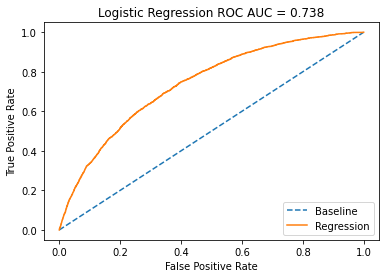

,metrics
accuracy,0.668473
f1,0.339096
roc_auc,0.737673
confusion,"[[12917, 6443], [897, 1883]]"


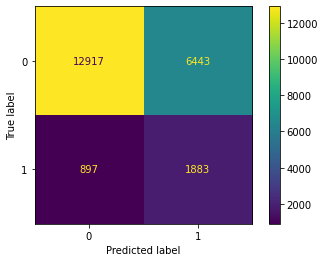

In [74]:
X = df_train.drop(['client_id','default'], axis=1).values
Y = df_train['default'].values

train, validation = train_test_split(df_train, test_size=0.3, random_state=42)

X_cat = OneHotEncoder(sparse = False).fit_transform(train[cat_cols].values)
X_num = StandardScaler().fit_transform(train[num_cols].values)
X_train = np.hstack([X_num, train[bin_cols].values, X_cat])
y_train = train['default'].values

X_cat_val = OneHotEncoder(sparse = False).fit_transform(validation[cat_cols].values)
X_num_val = StandardScaler().fit_transform(validation[num_cols].values)
X_validation = np.hstack([X_num_val, validation[bin_cols].values, X_cat_val])
y_true = validation['default'].values

model = LogisticRegression(C =1.0, class_weight='balanced' ,dual= False,intercept_scaling=1,l1_ratio=None,max_iter=150,
                             multi_class='auto', n_jobs=None,penalty="none",solver='sag',tol=0.02,verbose=0, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_validation)
y_pred_probs = model.predict_proba(X_validation)[:,1]

metrics = calculate(y_true, y_pred, y_pred_probs)
data_metrics = pd.DataFrame.from_dict(metrics, orient='index',columns = ['metrics'])

show_roc_auc(y_true, y_pred_probs)
display(data_metrics)
ConfusionMatrixDisplay(metrics['confusion']).plot()

In [75]:
X_cat = OneHotEncoder(sparse = False).fit_transform(df_test[cat_cols].values)
X_num = StandardScaler().fit_transform(df_test[num_cols].values)
X_test = np.hstack([X_num, df_test[bin_cols].values, X_cat])


y_sample = model.predict(X_test)
sample_df['default'] = y_sample

In [76]:
sample_df.to_csv('./submission.csv', index=False)
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36349 entries, 0 to 36348
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   client_id  36349 non-null  int64  
 1   default    36349 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 568.1 KB
